# JHU bootcamp 2018: Ahrens lab

## 1. Course overview
This course aims to provide an understanding of how to analyze large-scale neural activity in behaving animals. In this experiment, zebrafish adapt their swimming patterns while the visual stimuli move forward, backward and stop. We recorded neural activity across the entire brain at single-cell resolution during this behavior.

<!---
![](pics/Fig_1.png)
--->

**Movie (below): Zebrafish's swimming behavior and neural activity. Movie is available from this [link](activity_movie.mov)**

## 2. Goals
In this course, we aim to understand
(1) basic data handling and plotting skills in Matlab
(2) visualization of 3-dimensional data
(3) correlation between neural activity and behavioral variables
(4) dimensionality reduction of neural activity data

## 3. Format
We do (i) mini lecture/discussion (ii) coding exercise and (iii) Q&A for each section.   

## 4. Tutors
* Takashi Kawashima (postdoc, Ahrens lab @Janelia)
* Ziqiang Wei (postdoc, Ahrens lab @Janelia)
* Virginia Rutten (grad student, Ahrens lab @Janelia / Sahani lab @UCL)


<video controls src="activity_movie.mov" />

# Section 1: Load and plot data
## Download the data
Data is acquired at 1Hz, 1200 time points (2 minutes).

Please download the data from this link to your computer.
## Behavioral data structure
* `swim_power`: Swimming power of fish
* `visual_forward`: Forward movement of visual stimuli
* `visual_backward`: Backward movement of visual stimuli

## Neural data structure
* `neural_response_matrix`: 2D matrix(neuron number, time) -- 5896 (neurons) x 1200 (time points)
* `neural_position_XYZ`: 2D matrix(neuron number, location of cell) -- 5896 (neurons) x 293 (pixels per neuron)
* `Volume`: Averaged 3D volume 

## Colormap
* `blue_red`: Colormap which change like blue-white-red

## 1.1 Load data

In [1]:
clear variables; close all; %% clear all variables & close all windows
set(groot,'defaultfigureposition',[0 0 900 300]) % setting default figure size

% root_dir='/XXXX/XXXX/XXXX/';
root_dir='Data/';

load([root_dir,'behavioral_variables.mat']);
load([root_dir,'selected_neural_data.mat']);
load([root_dir,'colortable.mat']);

% Getting the dimension of the volume
dim=size(Volume);  

% Getting the number of cells
cellnum=size(neural_response_matrix,1);

% Getting the number of timepoints
T_max=size(neural_response_matrix,2);

## 1.2 Plot behavioral variables (Exercise)

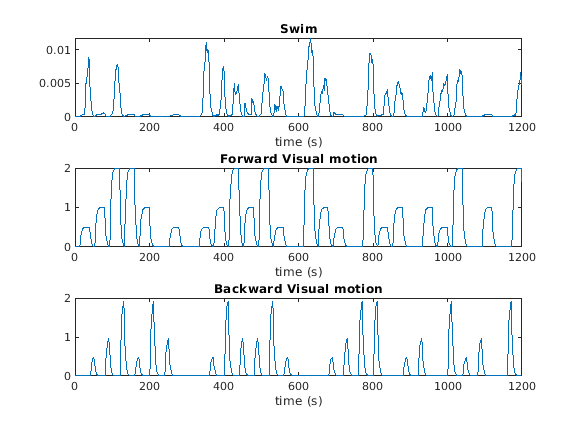

In [2]:
% Plot swim power
subplot(3,1,1);
plot(swim_power);xlabel('time (s)');title('Swim')

% Plot forward visual stimuli (Exercise)
subplot(3,1,2);
% visual_forward is forward_stimuli?
visual_forward = forward_stimuli;
plot(forward_stimuli);xlabel('time (s)');title('Forward Visual motion')
% visual_backward is backward_stimuli?
visual_backward = backward_stimuli;
% Plot backward visual stimuli (Exercise)
subplot(3,1,3);
plot(visual_backward);xlabel('time (s)');title('Backward Visual motion')

## 1.3 Plot neural activity  (Exercise)

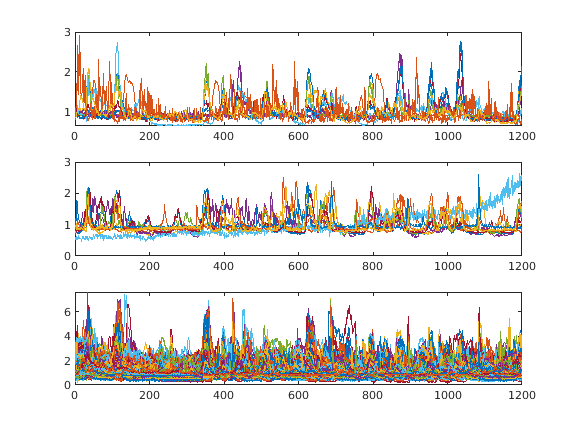

In [3]:
subplot(3,1,1);plot(neural_response_matrix(1:10,:)')
% Plot activity of next 10 cells (Exercise)
subplot(3,1,2);plot(neural_response_matrix(11:20,:)')
% Plot activity of all cells (Exercise)
subplot(3,1,3);plot(neural_response_matrix')

## Section 2: Visualization and indexing of a 3-dimensional volume
### (1) Projections
Multiple ways of projecting a 3D volume to a 2D image?
* Maximum, Minimum, Sum, Average....
* Pros and cons for each method

### (2) Indexing
Two ways of specifing a point in a 3D volume.
* Linear index (e.g., array(i)) and subscript (e.g., array(x,y,z))
* Pros anc cons

![](pics/Fig_2.png)

**Figure: linear index and subscript**

## 2.1 Plot volume projections from the top and the side (Exercise)

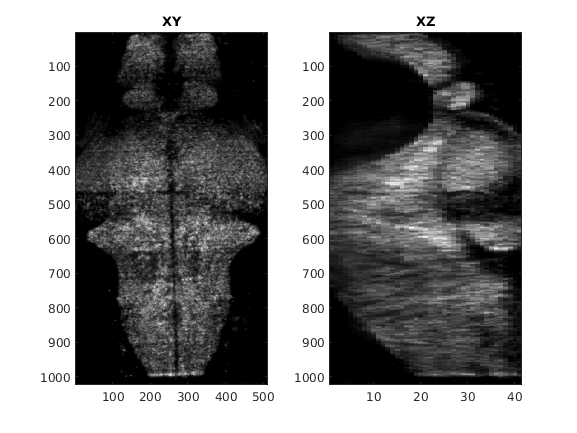

In [4]:

% Top projection view
Volume_XY=sum(Volume,3);

% Side projection view (Exercise)
Volume_XZ=sum(Volume,2);

% Show top view
figure(3);
subplot(1,2,1);imagesc(Volume_XY);
title('XY')
colormap('gray')  

% Show side view (Exercise)
subplot(1,2,2);imagesc(squeeze(Volume_XZ));
title('XZ')  

## 2.2 Plot cell location from the top and the side (Exercise)

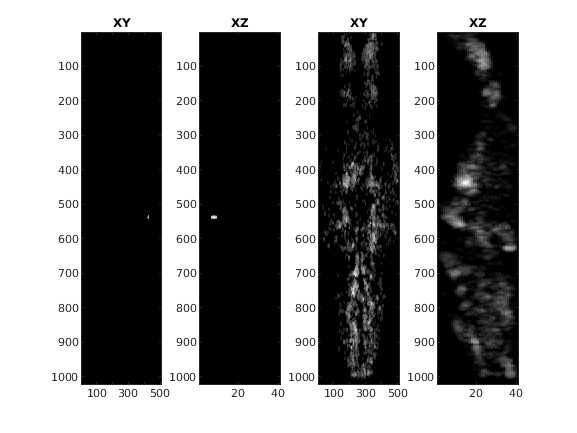

In [5]:

% plot location of cell #1 using linear index 

cell_map1=zeros(dim(1),dim(2),dim(3));

cell_map1(neural_position_XYZ(1,:))=1;

% Top projection view
cell_map1_XY=sum(cell_map1,3);

% Side projection view (Exercise)
cell_map1_XZ=sum(cell_map1,2);

% Show top view
figure(4);
subplot(1,4,1);imagesc(cell_map1_XY);
title('XY')
colormap('gray')  

% Show side view (Exercise)
subplot(1,4,2);imagesc(squeeze(cell_map1_XZ))
title('XZ')

% plot locations of all cells using linear index into panel 3 and 4 (Exercise)
% use loop over neurons

cell_map2=zeros(dim(1),dim(2),dim(3));

for c =1:cellnum
    cell_map2(neural_position_XYZ(c,:))=1;
end

% Top projection view
cell_map2_XY=sum(cell_map2,3);

% Side projection view 
cell_map2_XZ=sum(cell_map2,2);

% Show top view

subplot(1,4,3);imagesc(cell_map2_XY);
title('XY')

% Show side view (Exercise)
subplot(1,4,4);imagesc(squeeze(cell_map2_XZ))
title('XZ')

# Section 3: Correlation with behavioral variables
## (1) Pearson's correlation coefficient $\rho$

<h3><center>$\rho_{X,Y} =\frac{\textrm{Cov}\left(X,Y\right)}{\sigma_X \sigma_Y }=\frac{E\left\lbrack \left(X-\mu_X \right)\left(Y-\mu_Y \right)\right\rbrack }{\sigma_X \sigma_Y }$</center></h3>

* Cov is covariance, E is expectation
* $\mu_X$, $\mu_Y$ is the mean of X, Y
* $\sigma_X$, $sigma_Y$ is the standard deviation of X, Y

## (2) Multiple linear regression

<h3><center>$Y=\beta_0 +\beta_1 X_1 +\beta_2 X_2 +\beta_3 X_3 +\ldotp \ldotp \ldotp \ldotp$</center></h3>

* $X_1$, $X_2$, ... are different variables
* $\beta_0$ is constant (intercept)
* $\beta_2$, $\beta_2$,.... are regression coefficients

## (3) Pairwise correlation v.s. multiple regression
* Difference between the two
* Meaning of Z-scoring
* Pros & cons

## 3.1 Z-score behavioral variables

In [6]:
% Z-score the swim power
swim_power_norm=zscore(swim_power);


% Z-score the forward stimuli (Exercise)
visual_forward_norm=zscore(visual_forward);


% Z-score the backward stimuli (Exercise)
visual_backward_norm=zscore(visual_backward);

## 3.2 Z-score neural responses (Exercise)

In [7]:
neural_response_matrix_norm=zscore(neural_response_matrix,[],2);

## 3.3 Calculate correlations between swim power and neural responses

In [8]:
correlation_neuron_swim = corr(neural_response_matrix_norm', swim_power_norm');

## 3.4 Calculate correlations between forward/backward visual stimuli (Exercise)

In [9]:
correlation_neuron_forward = corr(neural_response_matrix_norm', visual_forward_norm');
correlation_neuron_backward = corr(neural_response_matrix_norm', visual_backward_norm');

## 3.5 Create correlation map across the whole brain (Exercise)

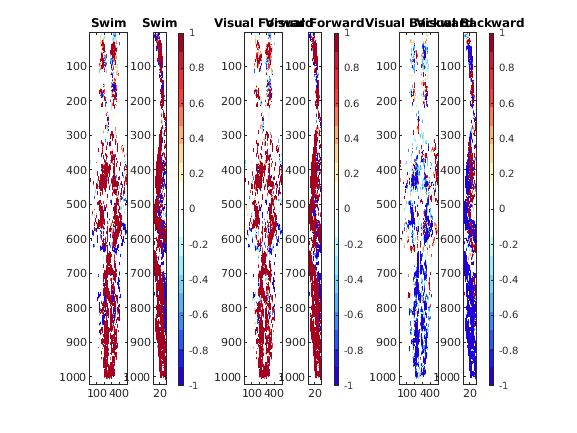

In [10]:
% Mimic the code used in "Show Cell locations" above.
% Insert correlation values instead of 1

% Show correlation map to swim power 

cell_map1=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map1(neural_position_XYZ(c,:))=correlation_neuron_swim(c);
end

% Top projection view
cell_map_XY1=sum(cell_map1,3);

% Side projection view
cell_map_XZ1=sum(cell_map1,2);

% Show top and side views
figure(5);
set(gcf,'Name','Individual Regression')

subplot(1,6,1);imagesc(cell_map_XY1,[-1 1]);
title('Swim')
subplot(1,6,2);imagesc(squeeze(cell_map_XZ1),[-1 1]);
title('Swim')
colormap(blue_red);colorbar;

% Show correlation map to forward stimuli 

cell_map2=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map2(neural_position_XYZ(c,:))=correlation_neuron_forward(c);
end

% Top projection view
cell_map_XY2=sum(cell_map2,3);

% Side projection view
cell_map_XZ2=sum(cell_map2,2);
% Show top and side views

subplot(1,6,3);imagesc(cell_map_XY2,[-1 1]);
title('Visual Forward')
subplot(1,6,4);imagesc(squeeze(cell_map_XZ2),[-1 1]);
title('Visual Forward')
colormap(blue_red);colorbar;


% Show correlation map to backward stimuli


cell_map3=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map3(neural_position_XYZ(c,:))=correlation_neuron_backward(c);
end

% Top projection view
cell_map_XY3=sum(cell_map3,3);

% Side projection view
cell_map_XZ3=sum(cell_map3,2);

% Show top and side views

subplot(1,6,5);imagesc(cell_map_XY3,[-1 1]);
title('Visual Backward')
subplot(1,6,6);imagesc(squeeze(cell_map_XZ3),[-1 1]);
title('Visual Backward')
colormap(blue_red);colorbar;

## 3.6 Use multivariate regression to neural responses (Exercise)
use `regress` funciton

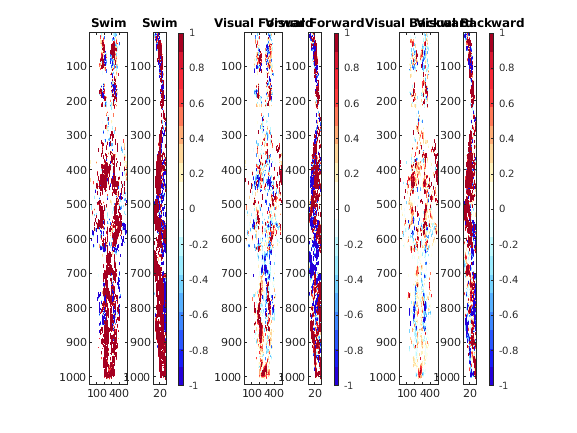

In [11]:
% prepare regressor vector, including intercept

regressor=[swim_power_norm; visual_forward_norm; visual_backward_norm; ones(1,1200)]';

% calculate beta for each regressor (Exercise)
betas=zeros(cellnum,4);

for c = 1:cellnum
    
    betas(c,:)=regress(neural_response_matrix_norm(c,:)',regressor);
    
end


% Show spatial regression map to swim power (Exercise)


cell_map4=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map4(neural_position_XYZ(c,:))=betas(c,1);
end

cell_map_XY4=sum(cell_map4,3);
cell_map_XZ4=sum(cell_map4,2);

figure(6);
set(gcf,'Name','Multiple Regression')

subplot(1,6,1);imagesc(cell_map_XY4,[-1 1]);
title('Swim')
subplot(1,6,2);imagesc(squeeze(cell_map_XZ4),[-1 1]);
title('Swim')
colormap(blue_red);colorbar;


% Show spatial regression map to forward stimuli (Exercise)

cell_map5=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map5(neural_position_XYZ(c,:))=betas(c,2);
end

cell_map_XY5=sum(cell_map5,3);
cell_map_XZ5=sum(cell_map5,2);

subplot(1,6,3);imagesc(cell_map_XY5,[-1 1]);
title('Visual Forward')
subplot(1,6,4);imagesc(squeeze(cell_map_XZ5),[-1 1]);
title('Visual Forward')
colormap(blue_red);colorbar;


% Show spatial regression map to backward stimuli (Exercise)

cell_map6=zeros(dim(1),dim(2),dim(3),'single');
for c=1:cellnum
    cell_map6(neural_position_XYZ(c,:))=betas(c,3);
end

cell_map_XY6=sum(cell_map6,3);
cell_map_XZ6=sum(cell_map6,2);

subplot(1,6,5);imagesc(cell_map_XY6,[-1 1]);
title('Visual Backward')
subplot(1,6,6);imagesc(squeeze(cell_map_XZ6),[-1 1]);
colormap(blue_red);colorbar;
title('Visual Backward')

# Section 4: Dimensionality reduction
## (1) What is dimensionality reduction? Why necessary?
* Difficulty of large-scale dataset
* Difference from regression analysis

## (2) PCA v.s. NMF
* Difference
* Pros and cons
* What's suited for calcium imaging?

![](pics/Fig_3.png)

**Figure: PCA v.s. NMF of facial images**

## 4.1 Principal Component Analysis (PCA) and show maps for each component (Exercise)

In [ ]:
[coeff1,comp1]=pca(neural_response_matrix_norm','NumComponents',3);

for i=1:3    
    map=zeros(dim(1),dim(2),dim(3));
    %% plot PCA coefficient into spatial maps (exercise)    
    for c=1:cellnum
        map(neural_position_XYZ(c,:))=coeff1(c,i);
    end

    subplot(3, 5, (i-1)*5+1);

    %% top projection (exercise)
    imXY = sum(map,3);
    imagesc(imXY,[-0.25,0.25]);
    colormap(blue_red);
    axis off
    title(['Component ',num2str(i)])

    subplot(3, 5, (i-1)*5+2);

    %% side projection (exercise)
    imXZ = squeeze(sum(map,2));
    imagesc(imXZ,[-1 1]);
    colormap(blue_red);
    axis off

    subplot(3, 5, (i-1)*5+[3 4 5]);

    %% plot principal component (exercise)
    plot(comp1(:,i));
end

## 4.2 Non-Negative Matrix Factorization (NNMF) and show maps for each component

In [ ]:
rng(3,'twister') %% initialize to a specific seed
[comp2,coeff2]=nnmf(neural_response_matrix_norm',3);

figure(8);
set(gcf,'name','Non-negative matrix factorization')
for i=1:3    
    map=zeros(dim(1),dim(2),dim(3));
    %% plot NMF coefficient into spatial maps (exercise)

    for c=1:cellnum
        map(neural_position_XYZ(c,:))=coeff2(i,c);
    end
    
    subplot('Position',[0.01 1.00-0.32*i 0.15 0.25]);
    
    %% top projection (exercise)
    imXY=sum(map,3);
    imagesc(imXY,[-0.25,0.25]);
    colormap(blue_red);
    axis off
    title(['Component ',num2str(i)])
    
    subplot('Position',[0.17 1.00-0.32*i 0.075 0.25])
    
    %% side projection (exercise)
    imXZ=squeeze(sum(map,2));
    imagesc(imXZ,[-1 1]);
    colormap(blue_red);
    axis off
    
    subplot('Position',[0.3 1.00-0.32*i 0.68 0.25])
    
    %% plot NMF component (exercise)
    plot(comp2(:,i));
end